In [154]:
# Dependencies and Setup
import matplotlib.pyplot as plt
import pandas as pd
import scipy.stats as st
from pprint import pprint
import requests

import warnings
warnings.filterwarnings("ignore")

In [155]:
# Read the CSV file into the valuations DataFrame
file_path = "resources/valuations_by_zip.csv"
valuations = pd.read_csv(file_path)

# Now you have the DataFrame valuations with data from "valuations_by_zip.csv"
valuations.head(5)

,RegionID,SizeRank,RegionName,RegionType,StateName,State,City,Metro,CountyName,1/31/2000,...,9/30/2022,10/31/2022,11/30/2022,12/31/2022,1/31/2023,2/28/2023,3/31/2023,4/30/2023,5/31/2023,6/30/2023
0,61148,0,8701,zip,NJ,NJ,Lakewood,"New York-Newark-Jersey City, NY-NJ-PA",Ocean County,130495.05400,...,522911.9386,525760.9170,529585.5433,532686.3869,535392.3916,537659.7100,541718.3694,547034.2568,552740.3348,557699.9148
1,91982,1,77494,zip,TX,TX,Katy,"Houston-The Woodlands-Sugar Land, TX",Fort Bend County,223783.26330,...,489818.3844,488119.8233,486700.7429,484703.5506,482475.3787,481336.2020,482130.0237,484303.7853,486757.3268,489401.7676
2,91940,2,77449,zip,TX,TX,Katy,"Houston-The Woodlands-Sugar Land, TX",Harris County,113663.91730,...,286215.8130,285608.5459,284607.9114,283023.8272,281199.6336,279635.9665,278828.7963,278477.9276,278667.2520,279406.7706
3,62080,3,11368,zip,NY,NY,New York,"New York-Newark-Jersey City, NY-NJ-PA",Queens County,98291.00869,...,436429.3082,433923.3496,433047.6669,431340.1718,431285.7080,432070.7890,434946.1341,436790.9086,440642.7600,447181.4880
4,92593,4,78660,zip,TX,TX,Pflugerville,"Austin-Round Rock-Georgetown, TX",Travis County,184599.88630,...,461233.3543,454831.3355,447984.4616,440769.6379,434524.0617,429565.2938,426007.1345,422638.1156,420350.3307,419499.3968


In [156]:

def get_zip_code_data(zip_codes):
    base_url = "https://zip-code-master.p.rapidapi.com/detail/"

    headers = {
        "X-RapidAPI-Key": "558adedba3msh9b5c4fc48b9c426p17c2a9jsnae5efc3a2061",
        "X-RapidAPI-Host": "zip-code-master.p.rapidapi.com"
    }

    for zip_code in zip_codes:
        url = base_url + str(zip_code)
        response = requests.get(url, headers=headers)
        data = response.json()
        print(f"Data for Zip Code {zip_code}:")
        print(data)
        print()

# List of zip codes to fetch data for
zip_codes = [78741, 78729, 78748, 78724, 78733]

# Call the function to get data for the specified zip codes
# get_zip_code_data(zip_codes)

In [157]:
url = "https://zip-code-master.p.rapidapi.com/detail/78741"

headers = {
    "X-RapidAPI-Key": "558adedba3msh9b5c4fc48b9c426p17c2a9jsnae5efc3a2061",
    "X-RapidAPI-Host": "zip-code-master.p.rapidapi.com"
}

response = requests.get(url, headers=headers)
data_78741 = response.json()

# Extract the subcategories under the "summary" header
summary_data = data_78741.get("summary", {})
ethnicity_data = data_78741.get("ethnicity", {})
education_data = data_78741.get("education", {})

# Filter the specific categories for zipcode 78741
filtered_data_78741 = {
    "ZipCode": summary_data.get("zip_code"),
    "Population": summary_data.get("population"),
    "MedianHouseholdIncome": summary_data.get("median_household_income"),
}

# Convert the 'ethnicity_data' and 'education_data' dictionaries to DataFrames
ethnicity_df = pd.DataFrame(ethnicity_data.items(), columns=["Ethnicity", "Value"])
education_df = pd.DataFrame(education_data.items(), columns=["Education", "Value"])

# Concatenate the 'ethnicity_df' and 'education_df' vertically to create the final DataFrame
zip_78741 = pd.concat([pd.DataFrame([filtered_data_78741]), ethnicity_df, education_df], axis=1)

# # Now you have the DataFrame zip_78741 with filtered data for zipcode 78741
# print(zip_78741)

# Save the DataFrame to a CSV file in the "resources" folder
file_name = "resources/zip_78741.csv"
zip_78741.to_csv(file_name, index=False)

In [158]:
url = "https://zip-code-master.p.rapidapi.com/detail/78729"

headers = {
    "X-RapidAPI-Key": "558adedba3msh9b5c4fc48b9c426p17c2a9jsnae5efc3a2061",
    "X-RapidAPI-Host": "zip-code-master.p.rapidapi.com"
}

response = requests.get(url, headers=headers)
data_78729 = response.json()

# Extract the subcategories under the "summary" header
summary_data1 = data_78729.get("summary", {})
ethnicity_data1 = data_78729.get("ethnicity", {})
education_data1 = data_78729.get("education", {})

# Filter the specific categories for zipcode 78729
filtered_data_78729 = {
    "ZipCode": summary_data1.get("zip_code"),
    "Population": summary_data1.get("population"),
    "MedianHouseholdIncome": summary_data1.get("median_household_income"),
}

# Convert the 'ethnicity_data' and 'education_data' dictionaries to DataFrames
ethnicity_df1 = pd.DataFrame(ethnicity_data1.items(), columns=["Ethnicity", "Value"])
education_df1 = pd.DataFrame(education_data1.items(), columns=["Education", "Value"])

# Concatenate the 'ethnicity_df' and 'education_df' vertically to create the final DataFrame
zip_78729 = pd.concat([pd.DataFrame([filtered_data_78729]), ethnicity_df1, education_df1], axis=1)

# # Now you have the DataFrame zip_78729 with filtered data for zipcode 78729
# print(zip_78729)

# Save the DataFrame to a CSV file in the "resources" folder
file_name = "resources/zip_78729.csv"
zip_78729.to_csv(file_name, index=False)

In [159]:
url = "https://zip-code-master.p.rapidapi.com/detail/78748"

headers = {
    "X-RapidAPI-Key": "558adedba3msh9b5c4fc48b9c426p17c2a9jsnae5efc3a2061",
    "X-RapidAPI-Host": "zip-code-master.p.rapidapi.com"
}

response = requests.get(url, headers=headers)
data_78748 = response.json()

# Extract the subcategories under the "summary" header
summary_data2 = data_78748.get("summary", {})
ethnicity_data2 = data_78748.get("ethnicity", {})
education_data2 = data_78748.get("education", {})

# Filter the specific categories for zipcode 78748
filtered_data_78748 = {
    "ZipCode": summary_data2.get("zip_code"),
    "Population": summary_data2.get("population"),
    "MedianHouseholdIncome": summary_data2.get("median_household_income"),
}

# Convert the 'ethnicity_data' and 'education_data' dictionaries to DataFrames
ethnicity_df2 = pd.DataFrame(ethnicity_data2.items(), columns=["Ethnicity", "Value"])
education_df2 = pd.DataFrame(education_data2.items(), columns=["Education", "Value"])

# Concatenate the 'ethnicity_df' and 'education_df' vertically to create the final DataFrame
zip_78748 = pd.concat([pd.DataFrame([filtered_data_78748]), ethnicity_df2, education_df2], axis=1)

# # Now you have the DataFrame zip_78748 with filtered data for zipcode 78748
# print(zip_78748)

# Save the DataFrame to a CSV file in the "resources" folder
file_name = "resources/zip_78748.csv"
zip_78748.to_csv(file_name, index=False)

In [160]:
url = "https://zip-code-master.p.rapidapi.com/detail/78724"

headers = {
    "X-RapidAPI-Key": "558adedba3msh9b5c4fc48b9c426p17c2a9jsnae5efc3a2061",
    "X-RapidAPI-Host": "zip-code-master.p.rapidapi.com"
}

response = requests.get(url, headers=headers)
data_78724 = response.json()

# Extract the subcategories under the "summary" header
summary_data3 = data_78724.get("summary", {})
ethnicity_data3 = data_78724.get("ethnicity", {})
education_data3 = data_78724.get("education", {})

# Filter the specific categories for zipcode 78724
filtered_data_78724 = {
    "ZipCode": summary_data3.get("zip_code"),
    "Population": summary_data3.get("population"),
    "MedianHouseholdIncome": summary_data3.get("median_household_income"),
}

# Convert the 'ethnicity_data' and 'education_data' dictionaries to DataFrames
ethnicity_df3 = pd.DataFrame(ethnicity_data3.items(), columns=["Ethnicity", "Value"])
education_df3 = pd.DataFrame(education_data3.items(), columns=["Education", "Value"])

# Concatenate the 'ethnicity_df' and 'education_df' vertically to create the final DataFrame
zip_78724 = pd.concat([pd.DataFrame([filtered_data_78724]), ethnicity_df3, education_df3], axis=1)

# # Now you have the DataFrame zip_78724 with filtered data for zipcode 78724
# print(zip_78724)

# Save the DataFrame to a CSV file in the "resources" folder
file_name = "resources/zip_78724.csv"
zip_78724.to_csv(file_name, index=False)

In [161]:
url = "https://zip-code-master.p.rapidapi.com/detail/78733"

headers = {
    "X-RapidAPI-Key": "558adedba3msh9b5c4fc48b9c426p17c2a9jsnae5efc3a2061",
    "X-RapidAPI-Host": "zip-code-master.p.rapidapi.com"
}

response = requests.get(url, headers=headers)
data_78733 = response.json()

# Extract the subcategories under the "summary" header
summary_data4 = data_78733.get("summary", {})
ethnicity_data4 = data_78733.get("ethnicity", {})
education_data4 = data_78733.get("education", {})

# Filter the specific categories for zipcode 78733
filtered_data_78733 = {
    "ZipCode": summary_data4.get("zip_code"),
    "Population": summary_data4.get("population"),
    "MedianHouseholdIncome": summary_data4.get("median_household_income"),
}

# Convert the 'ethnicity_data' and 'education_data' dictionaries to DataFrames
ethnicity_df4 = pd.DataFrame(ethnicity_data4.items(), columns=["Ethnicity", "% of People of this Ethinicy"])
education_df4 = pd.DataFrame(education_data4.items(), columns=["Degree Earned ", "% of People with this Degree"])

# Concatenate the 'ethnicity_df' and 'education_df' vertically to create the final DataFrame
zip_78733 = pd.concat([pd.DataFrame([filtered_data_78733]), ethnicity_df4, education_df4], axis=1)

# Save the DataFrame to a CSV file in the "resources" folder
file_name = "resources/zip_78733.csv"
zip_78733.to_csv(file_name, index=False)

# # Now you have the DataFrame zip_78733 with filtered data for zipcode 78733
# zip_78733

In [162]:
# Create new datafram filtered to only contain rows for our zip codes list
filtered_valuations = valuations[valuations["RegionName"].isin(zip_codes)]

In [163]:
# Filter the dataset to include only the coulumns labels and year required
needed_columns = ["RegionName", "State", "City", "1/31/2022", "2/28/2022", "3/31/2022", "4/30/2022",
                   "5/31/2022", "6/30/2022", "7/31/2022", "8/31/2022", "9/30/2022", "10/31/2022",
                   "11/30/2022", "12/31/2022"]

# Filter the zip codes dataframe to include only the needed columns
zip_2022_valuations = filtered_valuations[needed_columns]

In [164]:
# Calculate the mean for all of 2022 in a new column
zip_2022_valuations["2022 Avg. Value"] = zip_2022_valuations.loc[:, '1/31/2022':'12/31/2022'].mean(axis=1)


# Format the new column
zip_2022_valuations["2022 Avg. Value"] = zip_2022_valuations["2022 Avg. Value"].map('${:,.2f}'.format)

zip_2022_valuations.set_index('RegionName')

zip_2022_valuations

,RegionName,State,City,1/31/2022,2/28/2022,3/31/2022,4/30/2022,5/31/2022,6/30/2022,7/31/2022,8/31/2022,9/30/2022,10/31/2022,11/30/2022,12/31/2022,2022 Avg. Value
1033,78748,TX,Austin,4.652866e+05,4.733472e+05,4.833207e+05,4.934197e+05,5.027540e+05,5.086169e+05,5.093862e+05,5.062323e+05,5.008487e+05,4.955328e+05,4.898461e+05,4.834550e+05,"$492,670.52"
1249,78741,TX,Austin,4.571036e+05,4.658295e+05,4.769514e+05,4.887252e+05,4.995065e+05,5.062650e+05,5.079121e+05,5.041299e+05,4.978170e+05,4.917514e+05,4.864464e+05,4.795754e+05,"$488,501.11"
3596,78729,TX,Austin,4.876452e+05,4.971723e+05,5.085553e+05,5.192117e+05,5.279416e+05,5.328750e+05,5.319058e+05,5.270526e+05,5.201671e+05,5.141451e+05,5.079558e+05,5.009961e+05,"$514,635.31"
4529,78724,TX,Austin,3.716417e+05,3.818066e+05,3.932160e+05,4.036223e+05,4.113314e+05,4.165404e+05,4.173921e+05,4.141002e+05,4.079590e+05,4.015914e+05,3.957094e+05,3.887497e+05,"$400,305.02"
8920,78733,TX,Austin,1.178402e+06,1.207223e+06,1.245478e+06,1.283010e+06,1.313326e+06,1.326954e+06,1.324098e+06,1.308751e+06,1.284460e+06,1.261612e+06,1.244879e+06,1.231585e+06,"$1,267,481.61"


## Create a bar chart displaying Average House Value per zipcode

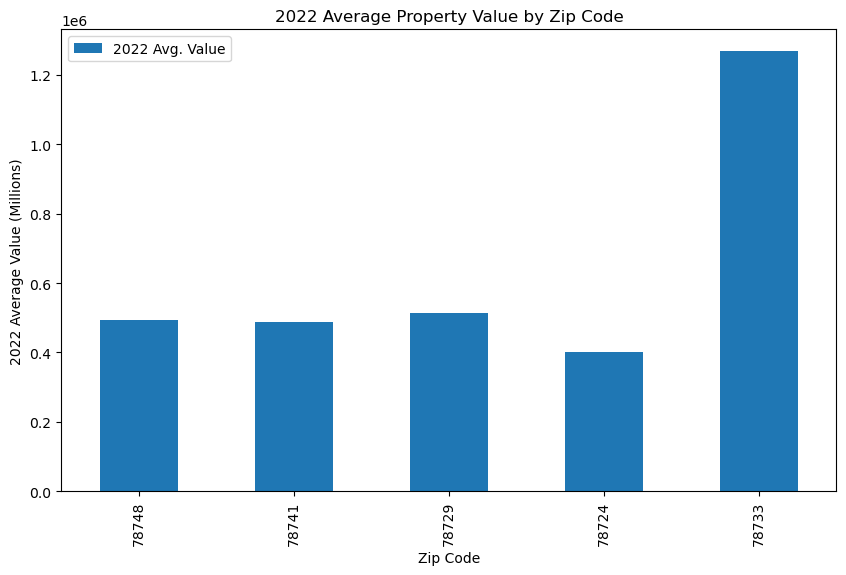

In [165]:
#Change the data in the DataFrame from String to Float
avg_valuation_by_zip_2022 = zip_2022_valuations.iloc[:,[0,-1]]
remove_character = lambda c: avg_valuation_by_zip_2022["2022 Avg. Value"].str.replace(c,"")
avg_valuation_by_zip_2022["2022 Avg. Value"] = remove_character("$")
avg_valuation_by_zip_2022["2022 Avg. Value"] = remove_character(",")
avg_valuation_by_zip_2022["2022 Avg. Value"] = avg_valuation_by_zip_2022["2022 Avg. Value"].astype(float)

#Create the bar chart and plot the data
avg_valuation_by_zip_2022.plot(
    kind="bar",
    x="RegionName",
    y="2022 Avg. Value",
    title="2022 Average Property Value by Zip Code",
    xlabel="Zip Code",
    ylabel="2022 Average Value (Millions)",
    figsize=(10,6)
);
plt.show()

## Create a histopgram displaying the monthly house values per zipcode for the year of 2022

In [166]:
# # Create a new clean DataFrame to pull only Zip codes and 2022 Avg. Values
# # Create a list of the columns to be included in the new DataFrame
# columns = ['RegionName', '1/31/2022', '2/28/2022', '3/31/2022', '4/30/2022',
#            '5/31/2022', '6/30/2022', '7/31/2022', '8/31/2022', '9/30/2022',
#            '10/31/2022', '11/30/2022', '12/31/2022']

# # Create the new DataFrame
# histogram_df = zip_2022_valuations[columns]

# # Set the index to the RegionName column
# histogram_df.set_index('RegionName', inplace=True)

# # Transpose the data in the dataframe
# transposed_hist_df = histogram_df.T

# # Print the new DataFrame
# transposed_hist_df

In [167]:
# Read the CSV file into the valuations DataFrame
file_path = "resources/austin_valuations_by_zip2.csv"
austin_vals2 = pd.read_csv(file_path)

# Now you have the DataFrame valuations with data from "valuations_by_zip.csv"
austin_vals2

,Month,78724,78729,78733,78741,78744
0,1/31/22,371641.74,487645.23,1178402.34,457103.57,387121.11
1,2/28/22,381806.65,497172.33,1207222.54,465829.52,395752.39
2,3/31/22,393216.04,508555.32,1245478.28,476951.37,405666.10
3,4/30/22,403622.25,519211.75,1283010.24,488725.22,415029.68
4,5/31/22,411331.36,527941.59,1313325.75,499506.46,423565.39
5,6/30/22,416540.36,532875.01,1326954.50,506264.95,429305.30
6,7/31/22,417392.08,531905.79,1324097.68,507912.11,430692.62
7,8/31/22,414100.23,527052.59,1308750.58,504129.92,427638.24
8,9/30/22,407958.99,520167.13,1284460.27,497817.02,421851.61
9,10/31/22,401591.44,514145.10,1261612.37,491751.39,415953.93


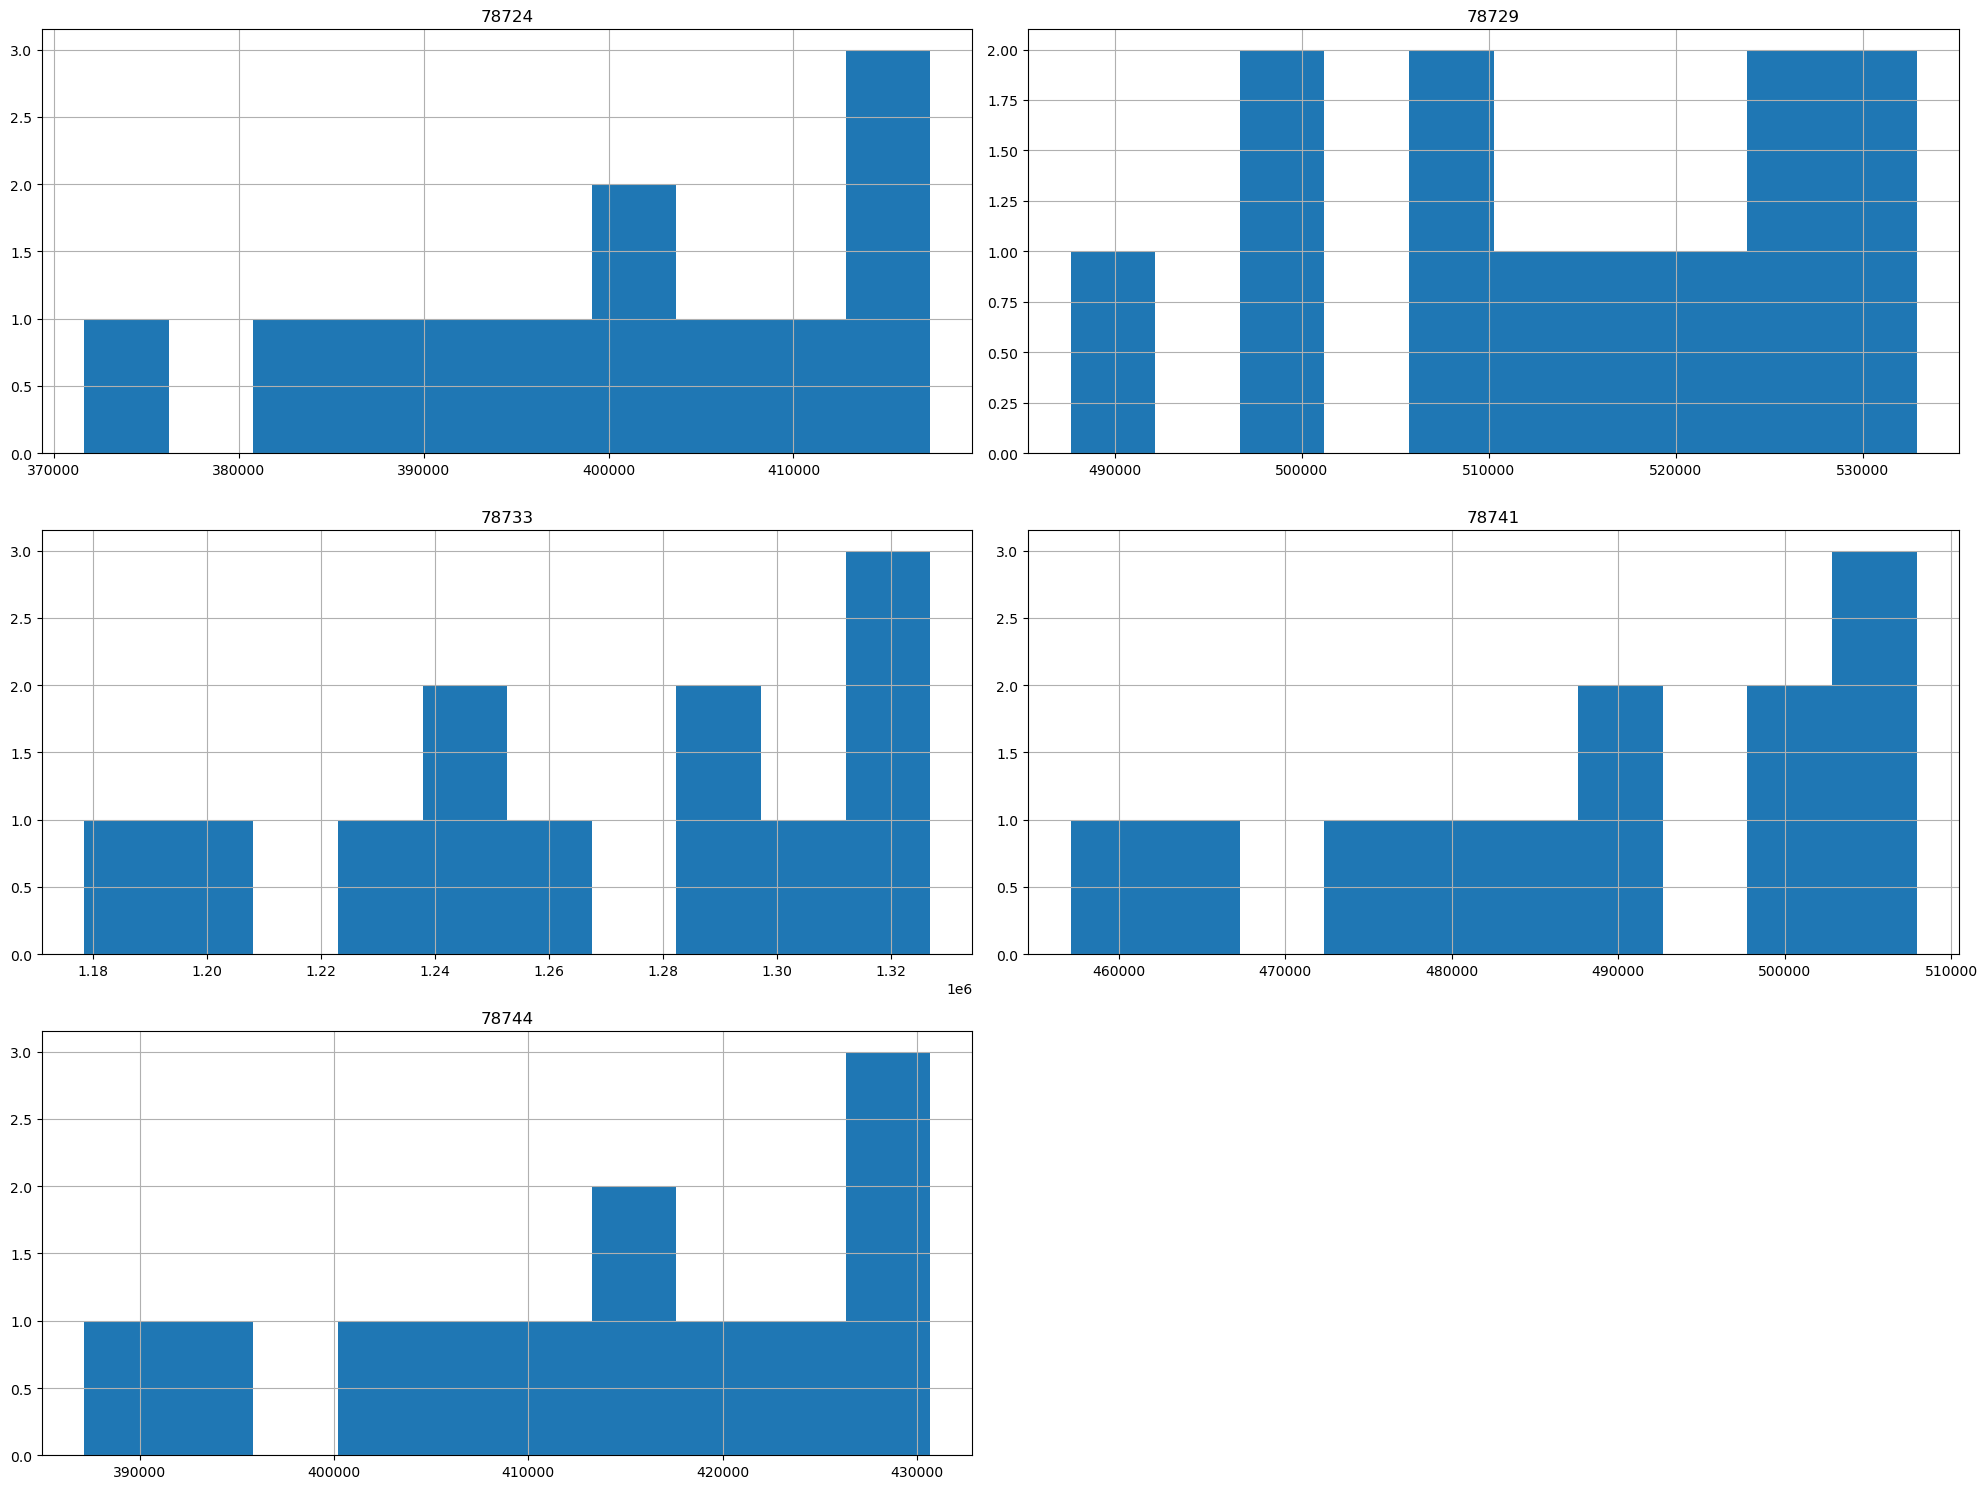

In [196]:
# Get the unique zip codes
zip_codes = austin_vals2.columns[1:].tolist()

austin_vals2[zip_codes].hist(figsize=(20, 15))

# Plot each histogram
for zip_code in zip_codes:
    plt.title(f'Monthly Average Housing Value for Zip Code {zip_code} for 2022')
    plt.xlabel('Months')
    plt.ylabel('Average Monthly Value')
    
    # Convert date strings to numerical representation (e.g., "1/31/22" -> 1, "2/28/22" -> 2, etc.)
    month_numerical = [pd.to_datetime(month, format='%m/%d/%y').month for month in austin_vals2["Month"]]

    # Set the tick values for x-axis as the values in the "Month" column
    plt.xticks(month_numerical)
    plt.xticks(rotation=45, ha="right")

    # Set the tick values for y-axis as numbers from 0 to 750000
    plt.ylim(0, 750000)
    plt.yticks(range(0, 750001, 25000), fontsize=12)
    plt.tight_layout()

    # Display all the plots
    plt.show()

In [195]:
# avg_valuation_by_zip_2022 = zip_2022_valuations.iloc[:,[0,-1]]



# # Extract the relevant columns and convert '2022 Avg. Value' to float
# avg_valuation_by_zip_2022 = zip_2022_valuations.iloc[:, [0] + list(range(3, 15))]
# avg_valuation_by_zip_2022.iloc[:, 1:] = avg_valuation_by_zip_2022.iloc[:, 1:].replace({'\$': '', ',': ''}, regex=True).astype(float)

# # Transpose the DataFrame to have zip codes as rows and months as columns
# transposed_data = avg_valuation_by_zip_2022.T

# # Set 'RegionName' as the DataFrame index
# avg_valuation_by_zip_2022.set_index('RegionName', inplace=True)

# # Create the histogram for each zip code
# avg_valuation_by_zip_2022.plot(
#     kind='bar',
#     stacked=True,
#     title='2022 Average Property Value by Zip Code',
#     xlabel='Zip Codes',
#     ylabel='2022 Average Value (Millions)',
#     figsize=(12, 6)
# )

# plt.xticks(rotation=0)
# plt.legend(title='Zip Code', bbox_to_anchor=(1, 1))
# plt.show()

# # Specify the columns to be used for the histogram
# columns = ['2022 Avg. Value']

# # Create the histogram
# avg_valuation_by_zip_2022[columns].hist(
#     title='2022 Average Property Value by Zip Code',
#     xlabel='Zip Codes',
#     ylabel='2022 Average Value (Millions)',
#     figsize=(12, 6)
# )

# plt.xticks(rotation=0)
# plt.legend(title='Zip Code', bbox_to_anchor=(1, 1))
# plt.show()



## Create a bar chart displaying median household income per zipcode

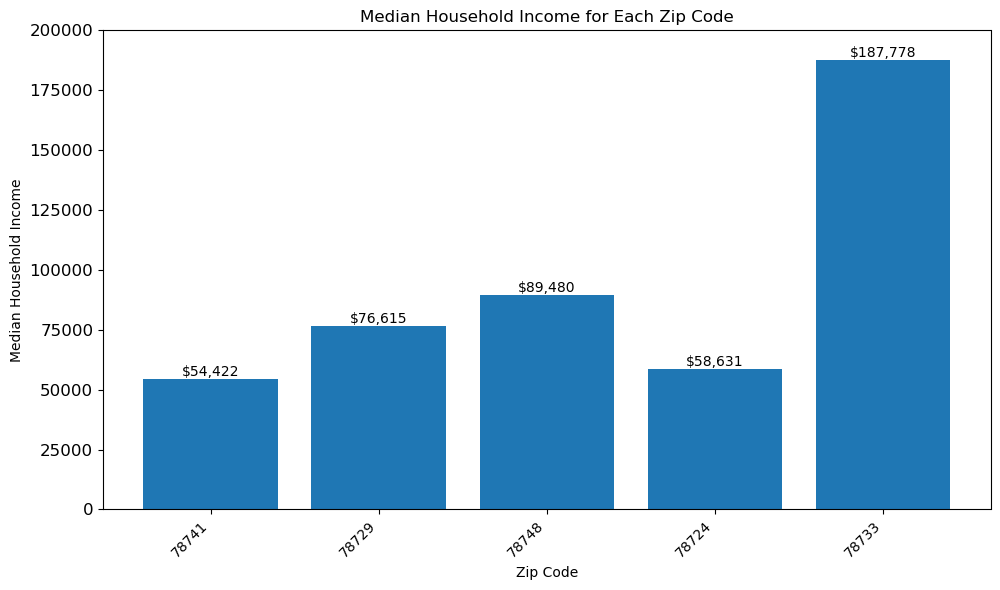

In [160]:
# Extract median household income for each zip code
median_income_78741 = zip_78741["MedianHouseholdIncome"].values[0]
median_income_78729 = zip_78729["MedianHouseholdIncome"].values[0]
median_income_78748 = zip_78748["MedianHouseholdIncome"].values[0]
median_income_78724 = zip_78724["MedianHouseholdIncome"].values[0]
median_income_78733 = zip_78733["MedianHouseholdIncome"].values[0]

# Create a list of median household income values
median_household_incomes = [median_income_78741, median_income_78729, median_income_78748, median_income_78724, median_income_78733]

# Convert data to integers
median_household_incomes = [int(income.replace("$", "").replace(",", "")) for income in median_household_incomes]

# Create a list of zip codes
zip_codes2 = ['78741', '78729', '78748', '78724', '78733']

# Create a bar plot
plt.figure(figsize=(10, 6))
bars = plt.bar(zip_codes2, median_household_incomes)
plt.xlabel("Zip Code")
plt.ylabel("Median Household Income")
plt.title("Median Household Income for Each Zip Code")
plt.ylim(0, 200000)
plt.xticks(rotation=45, ha="right")
plt.tight_layout()
plt.yticks(range(0, 200001, 25000), fontsize=12)

# Add text labels to the top of each bar
for bar, income in zip(bars, median_household_incomes):
    height = bar.get_height()
    plt.text(bar.get_x() + bar.get_width() / 2, height, f"${income:,}", ha="center", va="bottom", fontsize=10)
plt.show()